In [1]:
import os
import requests


# get PDF document path

pdf_path = "human-nuitrition-text.pdf"

if not os.path.exists(pdf_path):
    print(f"[Info] File doesn't exit, downloading...")

    # download pdf file
    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    # The local file to save the download file
    filename = pdf_path

    # send  a get request to the URL
    response = requests.get(url)

    # check if the request was successful
    if response.status_code == 200:
        # Open file and save it
        with open(filename,"wb") as file:
            file.write(response.content)
        print(f"[INFO] the file has been download and saved as{filename}")
    else:
        print(f"failed to download file. Status code: {response.status_code}")
else:
    print(f"File path {pdf_path} exists.")


File path human-nuitrition-text.pdf exists.


In [2]:
import fitz  # require !pip install PyMuPDF

from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    clean_text = text.replace("\n"," ").strip()

    return clean_text

def open_and_read_pdf(pdf_path: str) -> "list[dict]":
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number,page in tqdm(enumerate(doc)):
        text = page.get_text()  
        text = text_formatter(text=text)
        pages_and_texts.append({"page_number" : page_number - 41,
                                "page_char_count" : len(text),
                                "page_word_count" : len(text.split(" ")),
                                "page_sentence_count_raw" : len(text.split(". ")),
                                "page_token_count" : len(text) / 4,
                                "text" : text})
    return pages_and_texts


pages_and_texts = open_and_read_pdf(pdf_path)
pages_and_texts[:20]

d:\Test\mtr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
1208it [00:04, 253.38it/s]


[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_number': -39,
  'page_char_count': 320,
  'page_word_count': 54,
  'page_sentence_count_raw': 1,
  'page_token_count': 80.0,
  'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'},
 {'page_number': -38,
  'page_char_count': 212,
  'page_word_count': 32,
  'page_sentence_count_raw': 1,
  'page_token_count': 53.0,
  'text': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food 

In [3]:
import random

random.sample(pages_and_texts,k=3)

[{'page_number': 495,
  'page_char_count': 1841,
  'page_word_count': 311,
  'page_sentence_count_raw': 13,
  'page_token_count': 460.25,
  'text': 'Societal Influence  In the United States, many societal factors influence the number of  calories burned in a day. Escalators, moving walkways, and elevators  (not to mention cars!) are common modes of transportation that  reduce average daily energy expenditure. Office work, high-stress  jobs, and occupations requiring extended working hours are all  societal pressures that reduce the time allotted for exercise of large  populations of Americans. Even the remote controls that many have  for various electronic devices in their homes contribute to the US  society being less active. More obesogenic factors were discussed in  the weight management section of this chapter.  Socioeconomic status has been found to be inversely proportional  to weight gain. One reason for this relationship is that inhabitants  of low-income neighborhoods have red

In [4]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [5]:
df.describe()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00000,1208.000000,1208.000000,1208.000000,1208.000000
mean,562.50000,1148.594371,198.889901,9.972682,287.148593
std,348.86387,560.441673,95.747365,6.187226,140.110418
min,-41.00000,0.000000,1.000000,1.000000,0.000000
25%,260.75000,762.750000,134.000000,4.000000,190.687500
50%,562.50000,1232.500000,215.000000,10.000000,308.125000
75%,864.25000,1605.250000,271.250000,14.000000,401.312500
max,1166.00000,2308.000000,429.000000,32.000000,577.000000


Further text processing(spliting pages into sentences)

1. We've done this by splitting on "."
2. We can do this with a NLP library such as spaCy and nltk.

In [6]:
from spacy.lang.en import English

nlp = English()

# add a sentencizer pipeline
nlp.add_pipe("sentencizer")

# create document instance as an example

doc = nlp("This is a sentence. This is another sentence. I like Elephants.")
assert len(list(doc.sents)) == 3
list(doc.sents)

[This is a sentence., This is another sentence., I like Elephants.]

In [7]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])

100%|██████████| 1208/1208 [00:07<00:00, 154.55it/s]


In [33]:
random.sample(pages_and_texts,k=1)


[{'page_number': 184,
  'page_char_count': 1587,
  'page_word_count': 272,
  'page_sentence_count_raw': 11,
  'page_token_count': 396.75,
  'text': 'The Nutrition Facts panel displays the amount of sodium (in  milligrams) per serving of the food in question (Figure 3.10  “Nutrition Label” ). Food additives are often high in sodium, for  example, monosodium glutamate (MSG) contains 12 percent  sodium. Additionally, baking soda, baking powder, disodium  phosphate, sodium alginate, and sodium nitrate or nitrite contain  a significant proportion of sodium as well. When you see a food’s  Nutrition Facts label, you can check the ingredients list to identify  the source of the added sodium. Various claims about the sodium  content in foods must be in accordance with Food and Drug  Administration (FDA) regulations (Table 3.4 “Food Packaging Claims  Regarding Sodium”).  Table 3.4 Food Packaging Claims Regarding Sodium  Claim  Meaning  “Light in Sodium” or “Low in Sodium”  Sodium is reduced by a

In [9]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)


,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,9.97,287.15,10.32
std,348.86,560.44,95.75,6.19,140.11,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.75,134.00,4.00,190.69,5.00
50%,562.50,1232.50,215.00,10.00,308.12,10.00
75%,864.25,1605.25,271.25,14.00,401.31,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


In [10]:
# define split size to turn groups of sentences into chunks
num_sentence_chunk_size = 10

# create a function to split lists of texts recursively into chunks size
def split_list(input_list: "list[str]",
               slice_size: int=num_sentence_chunk_size) -> "list[list[str]]":
    return [input_list[i:i + slice_size] for i in range(0, len(input_list),slice_size)]

test_list = list(range(25))
split_list(test_list)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [11]:
# loop through pages and texts and split sentences into chunks

for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"]) 

100%|██████████| 1208/1208 [00:00<?, ?it/s]


In [12]:
random.sample(pages_and_texts,k=1)

[{'page_number': 240,
  'page_char_count': 1454,
  'page_word_count': 244,
  'page_sentence_count_raw': 11,
  'page_token_count': 363.5,
  'text': 'Digestion and Absorption of  Carbohydrates  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  From the Mouth to the Stomach  The mechanical and chemical digestion of carbohydrates begins  in the mouth. Chewing, also known as mastication, crumbles the  carbohydrate foods into smaller and smaller pieces. The salivary  glands in the oral cavity secrete saliva that coats the food particles.  Saliva contains the enzyme, salivary amylase. This enzyme breaks  the bonds between the monomeric sugar units of disaccharides,  oligosaccharides, and starches. The salivary amylase breaks down  amylose and amylopectin into smaller chains of glucose, called  dextrins and maltose. The increased concentration of maltose in the  mouth that results from the mechanical and chemical breakdown  of starches in who

In [13]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,9.97,287.15,10.32,1.53
std,348.86,560.44,95.75,6.19,140.11,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.75,134.00,4.00,190.69,5.00,1.00
50%,562.50,1232.50,215.00,10.00,308.12,10.00,1.00
75%,864.25,1605.25,271.25,14.00,401.31,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


### Splitting each chunk into its own item

In [14]:
import re

#split each chunk into its own item

pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # join the sentences together into a paragraph-like structure,aka join the list of sentences into one paragraph
        joined_sentence_chunk = "".join(sentence_chunk).replace("  "," ").strip()
        joined_sentence_chunk = re.sub( r'\.([A-Z])', r'. \1',joined_sentence_chunk)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # get some stats on our chunks
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4

        pages_and_chunks.append(chunk_dict)


        

100%|██████████| 1208/1208 [00:00<00:00, 5117.76it/s]


In [15]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 209,
  'sentence_chunk': 'Water Concerns UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM At this point you have learned how critical water is to support human life, how it is distributed and moved in the body, how fluid balance and composition is maintained, and the recommended amount of fluids a person should consume daily. In America you have a choice of thousands of different beverages. Which should you choose to receive the most health benefit and achieve your recommended fluid intake? Reading the Label Most beverages marketed in the United States have a Nutrition Facts panel and ingredients list, but some, such as coffee (for home consumption), beer, and wine, do not. As with foods, beverages that are nutrient-dense are the better choices, with the exception of plain water, which contains few to no other nutrients. Beverages do not make you full; they satiate your thirst. Therefore, the fewer calories in a bevera

In [16]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.83,112.72,183.71
std,347.79,447.43,71.07,111.86
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,45.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


### Filter chunk of text for short chunks

In [17]:
# use to eliminate, need to be considered
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')



Chunk token count: 5.5 | Text: You can Chloride | 193
Chunk token count: 22.0 | Text: PART I CHAPTER 1. BASIC CONCEPTS IN NUTRITION Chapter 1. Basic Concepts in Nutrition | 1
Chunk token count: 28.75 | Text: Image by FDA/ Changes to the Nutrition Facts Label Figure 12.5 Food Serving Sizes 728 | Discovering Nutrition Facts
Chunk token count: 24.75 | Text: view it online here: http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=130   Introduction | 149
Chunk token count: 4.5 | Text: 708 | Introduction


In [18]:
# Filter our DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [19]:
from sentence_transformers import SentenceTransformer
from dotenv import load_dotenv
load_dotenv()
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu")

# Create a list of sentences

sentences = ["The Sentence Transformer library provides an easy way to create embeddings.",
             "Sentences can be embedded one by one or in a list.",
             "I like someone :(."]

# Sentences encoded/embedded
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences,embeddings))

# see the embedding

for sentence, embedding in embeddings_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")



Sentence: The Sentence Transformer library provides an easy way to create embeddings.
Embedding: [-3.44286598e-02  2.95328684e-02 -2.33643278e-02  5.57257198e-02
 -2.19098665e-02 -6.47060992e-03  1.02848643e-02 -6.57803714e-02
  2.29717679e-02 -2.61120908e-02  3.80420387e-02  5.61403073e-02
 -3.68746556e-02  1.52787799e-02  4.37020473e-02 -5.19723371e-02
  4.89479750e-02  3.58105521e-03 -1.29750911e-02  3.54384817e-03
  4.23262641e-02  3.52606662e-02  2.49402281e-02  2.99176835e-02
 -1.99382417e-02 -2.39752568e-02 -3.33367428e-03 -4.30450588e-02
  5.72014488e-02 -1.32517852e-02 -3.54478285e-02 -1.13936206e-02
  5.55561222e-02  3.61096766e-03  8.88527097e-07  1.14027401e-02
 -3.82229686e-02 -2.43548932e-03  1.51314242e-02 -1.32725647e-04
  5.00659868e-02 -5.50876297e-02  1.73444785e-02  5.00959270e-02
 -3.75959016e-02 -1.04463650e-02  5.08322567e-02  1.24861207e-02
  8.67377147e-02  4.64143082e-02 -2.10690051e-02 -3.90251577e-02
  1.99696282e-03 -1.42345531e-02 -1.86794866e-02  2.826693

In [20]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

PyTorch version: 2.3.1+cu118
CUDA available: False
CUDA version: 11.8


In [21]:
%%time

embedding_model.to("cpu")

embedding each chunk one by one
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

CPU times: total: 0 ns
Wall time: 3.25 ms


SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [22]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: total: 0 ns
Wall time: 0 ns


'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture to their fascinating food creations. Add

In [23]:
%%time

text_chunks_embedding = embedding_model.encode(text_chunks,
                                                batch_size=32,
                                               convert_to_tensor=True)

text_chunks_embedding

NameError: name 'text_chunks_embedding' is not defined

In [24]:
# Save embedding to file

text_chunks_and_embedding_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embedding_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embedding_df.to_csv(embedding_df_save_path, index = False)


In [25]:
# import saved file and view

text_chunks_and_embedding_df_load = pd.read_csv(embedding_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50


2 - RAG - Search and Answer


In [28]:
import random
import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# import texts and embedding df

text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

#Convert embedding column back  to np.array
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x : np.fromstring(x.strip("[]"),sep=" "))

#Convert our embedding into a torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(),axis=0), dtype=torch.float32).to(device)

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df

KeyError: 'embedding'

In [ ]:
#embeddings.shape

torch.Size([1680, 768])

### Note to use dot product for comparasion, ensure vector sizes are the same of shape() and tensors/vectors are in the same datatype(both are in torch.float32)

In [27]:
from sentence_transformers import util,SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

# 1. Define the query
query = "breastfed infant"
print(f"Query: {query}")

# 2. Embed the query. Encorage using the same model embedded
query_embedding = embedding_model.encode(query,convert_to_tensor=True).to(device)

# 3.Get similarity scores with the dot product(or consine similarity)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding,b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")


# 4.Get the top-k results
top_results_dot_product = torch.topk(dot_scores,k=10)
top_results_dot_product

Query: breastfed infant
[INFO] Time taken to get scores on 3 embeddings: 0.01076 seconds.


RuntimeError: selected index k out of range

In [ ]:
#pages_and_chunks[1151]

{'page_number': 816,
 'sentence_chunk': 'milk is the best source to fulfill nutritional requirements. An exclusively breastfed infant does not even need extra water, including in hot climates. A newborn infant (birth to 28 days) requires feedings eight to twelve times a day or more. Between 1 and 3 months of age, the breastfed infant becomes more efficient, and the number of feedings per day often become fewer even though the amount of milk consumed stays the same. After about six months, infants can gradually begin to consume solid foods to help meet nutrient needs. Foods that are added in addition to breastmilk are called complementary foods. Complementary foods should be nutrient dense to provide optimal nutrition. Complementary foods include baby meats, vegetables, fruits, infant cereal, and dairy products such as yogurt, but not infant formula. Infant formula is a substitute, not a complement to breastmilk. In addition to complementary foods, the World Health Organization recommen

In [29]:
query_embedding.dtype

torch.float32

In [30]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text,wrap_length)
    print(wrap_length)


In [35]:
print(f"Query: '{query}' \n")
print("Result: ")
# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text: ")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]["page_number"]}") 
    print("\n")


SyntaxError: invalid syntax (3868409571.py, line 8)

# Note we could potentially improve the order of these result with a reranking model

Matplotlib is building the font cache; this may take a moment.


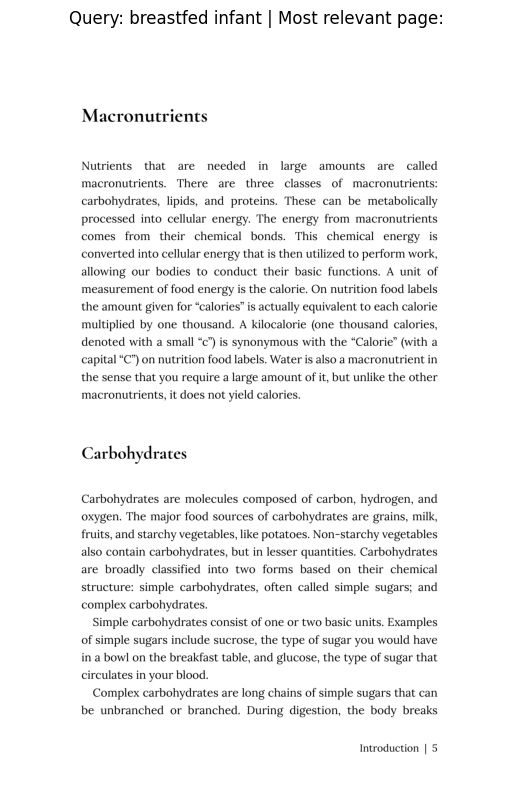

In [38]:
import fitz

# Open pdf

pdf_path =  "human-nuitrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41)

#get the image of the page
img = page.get_pixmap(dpi=300) 

# Save image (optional)
# Image.save("out_put_file_name.png")
doc.close()

 # Convert the pixmap into numpy array
img_array = np.frombuffer(img.samples_mv,
                        dtype=np.uint8).reshape((img.h,img.w,img.n))

# Display the image using matplotlib 
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: {query} | Most relevant page: ")
plt.axis("off")
plt.show()


### Similarity measures: Dot product and cosine similarity

Two of the most common similarity measures between vectors are dot product and cosine similarity.

In [43]:
import torch 

def dot_product(vector1, vector2):
    return torch.dot(vector1,vector2)

def cosine_similarity(v1, v2):
    # return torch.cosine_similarity(v1,v2) or

    dot_product = torch.dot(v1,v2)

    # Get Euclidean / L2 norm
    norm_v1 = torch.sqrt(torch.sum(v1**2))
    norm_v2 = torch.sqrt(torch.sum(v2**2))

    return dot_product / (norm_v1 * norm_v2)

v1 = torch.tensor([1, 2, 3],dtype=torch.float32)
v2 = torch.tensor([1, 2, 3],dtype=torch.float32)
v3 = torch.tensor([4, 5, 6],dtype=torch.float32)
v4 = torch.tensor([-1, -2, -3],dtype=torch.float32)





In [ ]:
import torch
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    embeds a query with model and returns top k scores and indices from embeddings
    """

    # Embeded the query
    query_embedding = model.encode(query,convert_to_tensor=True)

    # Get dot product scores on embeddings

    start_time = timer()
    dot_scores = util.dot_score(query_embedding,embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)}) embeddings: {end_time-start_time:.5f} seconds.")

    scores,indices = torch.topk(input=dot_scores,
                                k=n_resources_to_return)
    
    return scores,indices 


def print_top_results_and_scores(query: str,
                                embeddings: torch.tensor,
                                pages_and_chunks : "list[dict]"= pages_and_chunks,
                                n_resources_to_return: int=5):
    """
    
    Finds the relevant passages give by a query and prints them out along with their scores
    
    """

    scores,indices = retrieve_relevant_resources(query=query,
                                                embeddings=embeddings,
                                                n_resources_to_return=n_resources_to_return)
    
    for score, idx in zip(scores,indices):
        print(f"Score: {score:.4f}")
        print("Text: ")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]["page_number"]}") 
        print("\n")
    




In [ ]:
print_top_results_and_scores(query="macro nuitrients",embeddings=embeddings)


### Getting an LLM for local generation

In [1]:
### Checking local our GPU availability
import torch

gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"available GPU memory: {gpu_memory_gb} GB")



RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
!nvidia-smi

In [ ]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False 
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available


# 1. Create a quantization config
# Note: requires !pip install bitsandbytes accelerates
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus flash attention 2  = faster attention mechanism
# Flash attention 2 requires a GPU with a compute capability score of 8.0+

torch.cuda.get_device_capability(0)

if(is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0]) >= 8:
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa" 

# 2. Pick a model we'd like to use
#model_id = "google/gemma-7b-it"


# 3. Instantiate tokenizer

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)


# 4. Instantiate model

llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False,# use as much memory we can
                                                attn_implementation=attn_implementation)



if not use_quantization_config:
    llm_model.to("cuda")
    



d:\Test\mtr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'torch' is not defined

In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
    mem_params = sum([param.nelement()] * param.element_size() for param in model.parameters())
    mem_buffers = sum([buff.nelement()] * buff.element_size() for buff in model.buffers())

    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)

    return {"Model_mem_bytes: ", model_mem_bytes,
            "Model_mem_mb: ", round(model_mem_mb, 2),
            "Model_mem_gb: ", round(model_mem_gb, 2)}

get_model_mem_size(llm_model)


In [1]:
input_text = "What are the macronuitrients, and what roles do they play in the human body?"
print(f"Input text: {input_text}")

# Create a prompt template for instruction-tuned model  

dialogue_template = [
    {"role": "user",
     "content" : input_text}
]

# Apply the chat template

prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)

print(f"Prompt (fommated):\n{prompt}")





Input text: What are the macronuitrients, and what roles do they play in the human body?


NameError: name 'tokenizer' is not defined

In [3]:
#%%time

# Tokennize the input text (turn it into numbers) and send it to the GPU

input_ids = tokenizer(prompt,
                        return_tensors="pt").to("cuda")


# Generate outputs from local LLM

outputs = llm_model.generate(**input_ids,
                                max_new_tokens=256)

print(f"Model output (tokens): \n{outputs[0]}\n")


                         

NameError: name 'tokenizer' is not defined

In [4]:
# Decode the output tokens to text

outputs_decoded = tokenizer.decode(outputs[0])

print(f"Model output (decoded): \n{outputs_decoded}\n")


NameError: name 'tokenizer' is not defined

In [ ]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

In [5]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [6]:
query_list

['What are the macronutrients, and what roles do they play in the human body?',
 'How do vitamins and minerals differ in their roles and importance for health?',
 'Describe the process of digestion and absorption of nutrients in the human body.',
 'What role does fibre play in digestion? Name five fibre containing foods.',
 'Explain the concept of energy balance and its importance in weight management.',
 'How often should infants be breastfed?',
 'What are symptoms of pellagra?',
 'How does saliva help with digestion?',
 'What is the RDI for protein per day?',
 'water soluble vitamins']

In [ ]:
import random
query = random.choice(query_list)

score, indices = retrieve_relevant_resources(query=query,
                                             embeddings=embeddings)



In [ ]:
def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    # Update base prompt with context items and query   
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
    
# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

In [ ]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt 

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

### Funtionize


In [ ]:
def ask(query: str,
        temperature: float=0.7,
        max_new_tokens: int=256,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)
    
    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU 

    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)
    
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)
    
    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text
    
    return output_text, context_items